# Optimization

# Theory

In this notebook we will briefly consider the more general problem of fitting a model $\tilde y(\theta)$ to some obervations $y$, where $\theta$ are the model parameters

If the model is nonlinear, we will not be able to write simple, analytical estimator, so we will look for a numerical solution. This is very common for machine learning problems, where we cannot compute an optimal solution algebraically. 

We will generally fit the parameters by minimizing the misfit, i.e. by minimizing a cost function $J(\theta,y)$:

$$\hat\theta =\text{argmin } J(\theta,y)$$ 

A typical choice for the cost function is the least-squares cost function. If the errors are independent and normally distributed this is motivatd by maximum likelihood theory. However, this is generally a suitable function that can be useful even if there is no theoretical underpinning. For a set of observations $y(t_j)$, the cost function becomes
$$ J\left[\theta,y(t_j)\right]=\sum_j \left[\tilde y(\theta,t_j)-y(t_j)\right]^2$$

For now, we will use a simple python optimiziation method to minimize the cost function. There are several such methods, but they all behave the same. They require a cost function J, that is a function of the parameters, and needs to be minimized, and an initial condition $\theta_i$.

```
theta_hat=optimize.minimize(J,theta_init,args)
```

# Example Model
Consider the model $\tilde y(t)=y_0\cdot \exp (-t/\tau)$
with parameters $\theta =\{y_0,\tau\}$, which can be also written a 

$$\tilde y(\theta,t)=\theta_1 \cdot \exp (-t/\theta_2)$$

Let's first visualize the model, before fitting it to some synthetic observations

In [10]:
import numpy as np
import pandas as pd
from scipy import stats
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import cm
params = {'legend.fontsize': 'x-large',
          'figure.figsize': (15, 5),
         'axes.labelsize': 'x-large',
         'axes.titlesize':'x-large',
         'xtick.labelsize':'x-large',
         'ytick.labelsize':'x-large',
         'font.size':16}

plt.rcParams.update(params)


import xarray as xr

import cartopy.crs as ccrs

# 1 D model
$$ y=\theta t^2$$

$$ J=\sum_j (y_j - \theta t_j^2)^2$$

$$\frac{dJ}{d\theta}=2\sum_j (y_j - \theta t_j^2)(-t_j ^2)$$

In [11]:
def model(theta,t):
    y_model=theta*t**2
    return y_model

def Jcost(theta,y_obs,t):
    Jcost=np.sum( (y_obs-model(theta,t))**2)/len(t)
    return Jcost

def dJ(theta,y_obs,t):
    return -2*np.sum(y_obs*t**2-theta*t**4)/len(t)

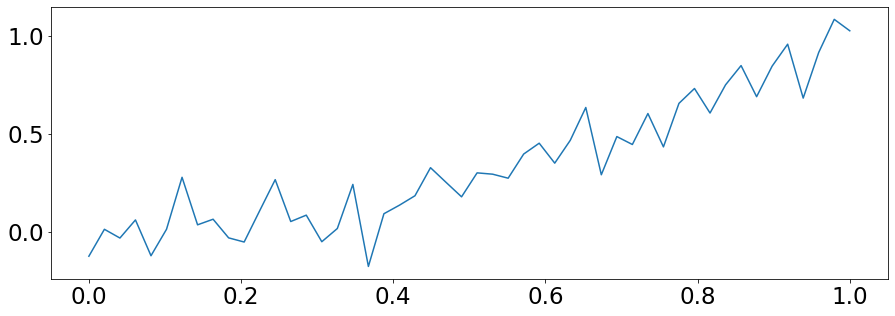

In [12]:
theta_truth=[1]
t=np.linspace(0,1,50)
y_obs=model(theta_truth,t)+stats.norm.rvs(loc=0,scale=0.1,size=len(t))
plt.plot(t,y_obs)

Text(0, 0.5, 'J(theta)')

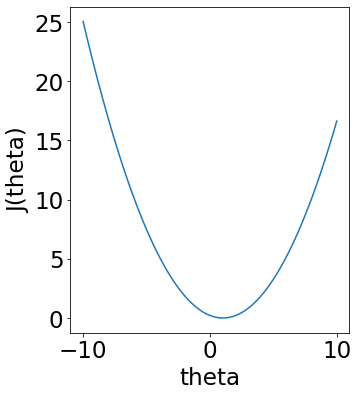

In [13]:
fig=plt.figure(figsize=[5,6])
N1=100
theta_vec=np.linspace(-10,10,N1)
J=np.zeros(shape=N1)
gradJ=np.zeros(shape=N1)
for j in range(N1):
    J[j]=Jcost(theta_vec[j],y_obs,t)
    gradJ[j]=dJ(theta_vec[j],y_obs,t)
plt.plot(theta_vec,J)
plt.xlabel('theta')
plt.ylabel('J(theta)')

200


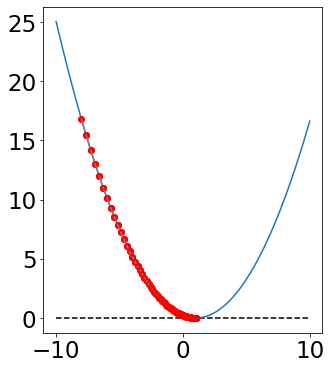

In [14]:
fig=plt.figure(figsize=[5,6])
N1=100
theta_vec=np.linspace(-10,10,N1)
J=np.zeros(shape=N1)
gradJ=np.zeros(shape=N1)
for j in range(N1):
    J[j]=Jcost(theta_vec[j],y_obs,t)
    gradJ[j]=dJ(theta_vec[j],y_obs,t)
plt.plot(theta_vec,J)



#Gradient Descent
theta_init=-8
p=0.1
max_iter=200
tol     =0.01

plt.hlines(tol,-10,10,linestyles='--',color='k')

iter=0
theta=theta_init
err=Jcost(theta,y_obs,t)

while err>tol and iter<max_iter:
    theta_new=theta-p*dJ(theta,y_obs,t)
    err_new=Jcost(theta_new,y_obs,t)
    plt.plot([theta,theta_new],[err,err_new],'ro')
    plt.plot([theta,theta_new],[err,err_new],'-',color=[0.5,0.5,0.5])
    theta=theta_new
    err=err_new
    iter=iter+1
    
print(iter)

# 2D Model


$$y=\theta_{0}e^{-t/\theta_{1}}$$

$$ J=\sum_{j}\left(y_{j}-\theta_{0}e^{-t_{j}/\theta_{1}}\right)^{2} $$

$$ \nabla J(\theta)=\left(\frac{\partial J}{\partial\theta_{0}},\frac{\partial J}{\partial\theta_{1}}\right)$$

$$\begin{cases}
\frac{\partial J}{\partial\theta_{0}}=-2\sum_{j}\left(y_{j}-\theta_{0}e^{-t_{j}/\theta_{1}}\right)e^{-t_{j}/\theta_{1}}\\
\frac{\partial J}{\partial\theta_{1}}=-2\sum_{j}\left(y_{j}-\theta_{0}e^{-t_{j}/\theta_{1}}\right)\theta_{0}e^{-t_{j}/\theta_{1}}\frac{t_{j}}{\theta_{1}^{2}}
\end{cases}$$ 

$$ \left(\theta_{0}^{n+1},\theta_{1}^{n+1}\right)=\left(\theta_{0},\theta_{1}\right)-p\cdot\nabla J(\theta)$$ 

In [15]:
def model(theta,t):
    y_model=theta[0]*np.exp(-t/theta[1])
    return y_model

def Jcost(theta,y_obs,t):
    Jcost=np.sum( (y_obs-model(theta,t))**2)/len(t)
    return Jcost

def Jgrad(theta,y_obs,t):
    dJ1=-2/len(t)*np.sum( (y_obs-theta[0]*np.exp(-t/theta[1]))*np.exp(-t/theta[1]) )
    dJ2=-2/len(t)*np.sum( (y_obs-theta[0]*np.exp(-t/theta[1]))*theta[0]*np.exp(-t/theta[1])*t/(theta[1]*theta[1])  )
    return np.asarray([dJ1,dJ2])


Text(0, 0.5, 'y')

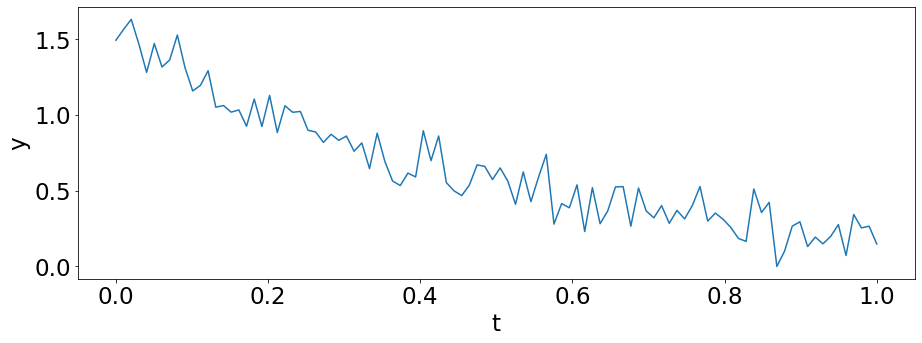

In [16]:
theta_truth=[1.5,0.5]
t=np.linspace(0,1,100)
y_obs=model(theta_truth,t)+stats.norm.rvs(loc=0,scale=0.1,size=len(t))
plt.plot(t,y_obs)
plt.xlabel('t')
plt.ylabel('y')

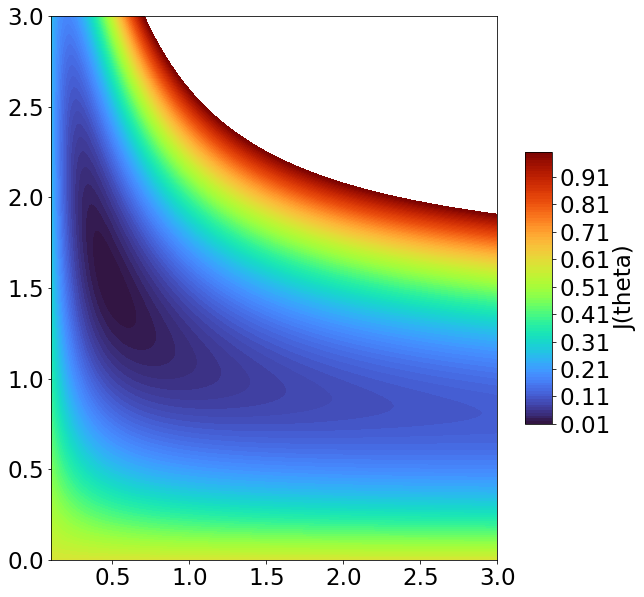

In [17]:
theta_init=[1.5,2.5]
p=1.3
max_iter=200
tol     =0.01


N1=200
N2=200
theta_0=np.linspace(0,3,N1);
theta_1=np.linspace(0.1,3,N2);

J=np.zeros(shape=[N1,N2]);

for j1 in range(N1):
    for j2 in range(N2):
        theta=[theta_0[j1],theta_1[j2]];
        J[j1,j2]=Jcost(theta,y_obs,t);    
        
fig, ax = plt.subplots(figsize=[10,10])
X,Y=np.meshgrid(theta_1,theta_0)

surf=ax.contourf(X,Y,J,cmap=cm.get_cmap('turbo'),
                       levels=np.linspace(tol,1,100))
#surf=ax.contourf(X,Y,J,cmap=cm.get_cmap('turbo'),
#                       linewidth=0)
fig.colorbar(surf, shrink=0.5, aspect=10,label='J(theta)');   



500
0.01


Text(0.5, 0, 'theta[1]')

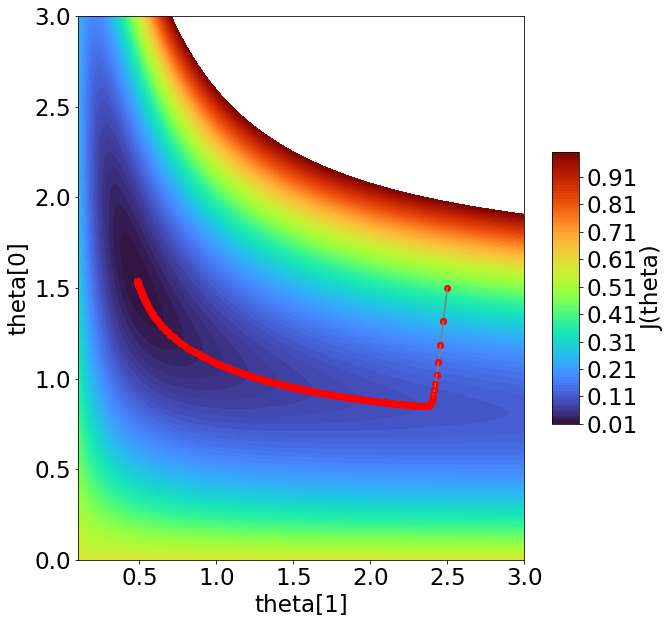

In [18]:


N1=200
N2=200
theta_0=np.linspace(0,3,N1);
theta_1=np.linspace(0.1,3,N2);

J=np.zeros(shape=[N1,N2]);

for j1 in range(N1):
    for j2 in range(N2):
        theta=[theta_0[j1],theta_1[j2]];
        J[j1,j2]=Jcost(theta,y_obs,t);    
        
fig, ax = plt.subplots(figsize=[10,10])
X,Y=np.meshgrid(theta_1,theta_0)

surf=ax.contourf(X,Y,J,cmap=cm.get_cmap('turbo'),
                       levels=np.linspace(tol,1,100))
#surf=ax.contourf(X,Y,J,cmap=cm.get_cmap('turbo'),
#                       linewidth=0)
fig.colorbar(surf, shrink=0.5, aspect=10,label='J(theta)');   




theta_init=[1.5,2.5]
p=0.2
max_iter=500
tol     =0.01


iter=0
theta=theta_init
err=Jcost(theta,y_obs,t)
Jc=np.empty(max_iter)
Jc[:]=np.NaN
while err>tol and iter<max_iter:
    theta_new=theta-p*Jgrad(theta,y_obs,t)
    err_new=Jcost(theta_new,y_obs,t)
    ax.plot([theta[1],theta_new[1]],[theta[0],theta_new[0]],'ro')
    ax.plot([theta[1],theta_new[1]],[theta[0],theta_new[0]],'-',color=[0.5,0.5,0.5])
    #plt.plot([theta,theta_new],[err,err_new],'-',color=[0.5,0.5,0.5])
    theta=theta_new
    err=err_new
    Jc[iter]=err
    iter=iter+1
print(iter)
print(tol)
ax.set_ylabel('theta[0]')
ax.set_xlabel('theta[1]')



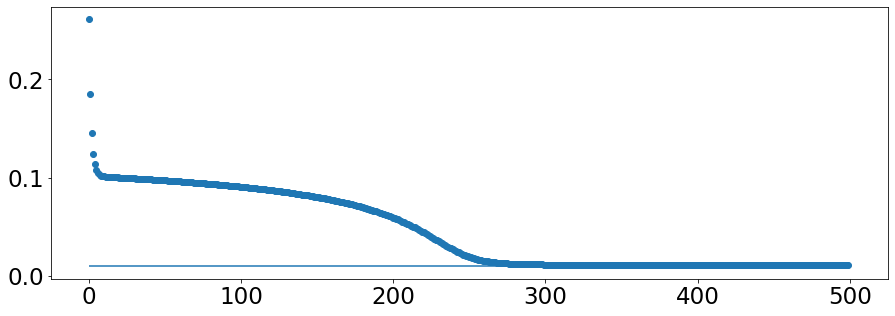

In [19]:
plt.plot(Jc,'o')
plt.hlines(tol,0,max_iter)

NameError: name 'random' is not defined

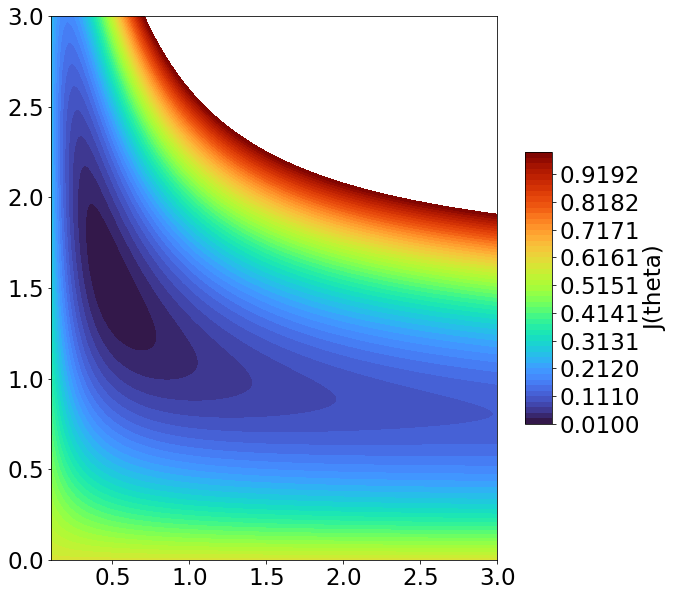

In [20]:



N1=200
N2=200
theta_0=np.linspace(0,3,N1);
theta_1=np.linspace(0.1,3,N2);

J=np.zeros(shape=[N1,N2]);

for j1 in range(N1):
    for j2 in range(N2):
        theta=[theta_0[j1],theta_1[j2]];
        J[j1,j2]=Jcost(theta,y_obs,t);    
        
fig, ax = plt.subplots(figsize=[10,10])
X,Y=np.meshgrid(theta_1,theta_0)

surf=ax.contourf(X,Y,J,cmap=cm.get_cmap('turbo'),
                       levels=np.linspace(tol,1,50))
#surf=ax.contourf(X,Y,J,cmap=cm.get_cmap('turbo'),
#                       linewidth=0)
fig.colorbar(surf, shrink=0.5, aspect=10,label='J(theta)');   

theta_init=[1.5,2.5]
p=0.05
max_iter=500
tol     =0.01

iter=0
theta=theta_init
err=Jcost(theta,y_obs,t)

while err>tol and iter<max_iter:
    K=random.sample(range(len(t)),10)
    theta_new=theta-p*Jgrad(theta,y_obs[K],t[K])
    err_new=Jcost(theta_new,y_obs,t)
    ax.plot([theta[1],theta_new[1]],[theta[0],theta_new[0]],'ro')
    ax.plot([theta[1],theta_new[1]],[theta[0],theta_new[0]],'-',color=[0.5,0.5,0.5])
    #plt.plot([theta,theta_new],[err,err_new],'-',color=[0.5,0.5,0.5])
    theta=theta_new
    err=err_new
    iter=iter+1
print(iter)
print(tol)
ax.set_ylabel('theta[0]')
ax.set_xlabel('theta[1]')


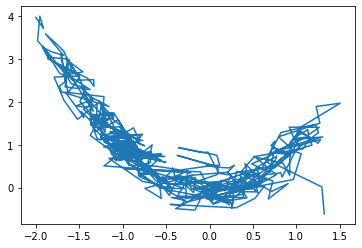

In [13]:
import numpy as np
from   numpy.random import multivariate_normal as mvn
import matplotlib.pyplot as plt

n_iters    = 1000
samples    = np.empty((n_iters, 2))
samples[0] = np.random.uniform(low=[-3, -3], high=[3, 10], size=2)
rosen      = lambda x, y: np.exp(-((1 - x)**2 + 100*(y - x**2)**2) / 20)

for i in range(1, n_iters):
    curr  = samples[i-1]
    prop  = curr + mvn(np.zeros(2), np.eye(2) * 0.1)
    alpha = rosen(*prop) / rosen(*curr)
    if np.random.uniform() < alpha:
        curr = prop
    samples[i] = curr

plt.plot(samples[:, 0], samples[:, 1])
plt.show()

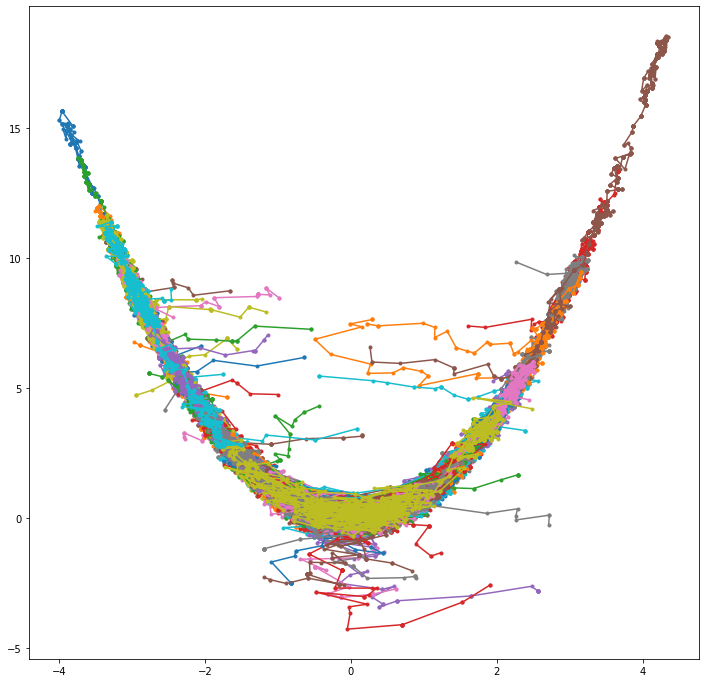

In [19]:
import numpy as np
from   numpy.random import multivariate_normal as mvn
import matplotlib.pyplot as plt

fig,ax=plt.subplots(1,1,figsize=[12,12])
for k in range(50):
 
    n_iters    = 1000
    samples    = np.empty((n_iters, 2))
    samples[0] = np.random.uniform(low=[-3, -3], high=[3, 10], size=2)
    rosen      = lambda x, y: np.exp(-((1 - x)**2 + 100*(y - x**2)**2) / 20)

    for i in range(1, n_iters):
        curr  = samples[i-1]
        prop  = curr + mvn(np.zeros(2), np.eye(2) * 0.1)
        alpha = rosen(*prop) / rosen(*curr)
        if np.random.uniform() < alpha:
            curr = prop
        samples[i] = curr

    ax.plot(samples[:, 0], samples[:, 1],'.-')